### Import Library

In [1]:
import numpy as np #Operasi Matematika dan linear aljebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #Visualisasi data
import seaborn as sns #Visualisasi data

### Load Datasets

In [2]:
# loading data with pandas read_csv
data = pd.read_csv('Indeks Stabilitas Keuangan.csv',sep=";")

In [3]:
#Cek dimensi data
data.shape

(50, 6)

In [4]:
#Melihat 5 data pertama
data.head()

,Indeks stabilitas sistem keuangan,IHSG,IHPR,Perkembangan Kredit,Kurs,Jumlah uang beredar
0,0.96,2598.33,131.89,1158.72,9.59,1991.58
1,0.96,416.67,135.89,133.03,8.48,684.34
2,1.06,1069.48,124.97,446.02,9.10,1016.24
3,0.92,385.33,137.47,308.06,7.25,577.38
4,1.04,2645.71,132.79,1217.66,9.63,2075.04


In [5]:
#Memahami info masing-masing variabel
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Indeks stabilitas sistem keuangan  50 non-null     float64
 1   IHSG                               50 non-null     float64
 2   IHPR                               50 non-null     float64
 3   Perkembangan Kredit                50 non-null     float64
 4   Kurs                               50 non-null     float64
 5   Jumlah uang  beredar               50 non-null     float64
dtypes: float64(6)
memory usage: 2.5 KB


In [6]:
#Melihat ringkasan 5 angka dari data
data.describe()

,Indeks stabilitas sistem keuangan,IHSG,IHPR,Perkembangan Kredit,Kurs,Jumlah uang beredar
count,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,0.965200,2607.165400,150.964600,1965.57500,10.201800,2179.935000
std,0.141078,1907.860695,21.987873,4086.69641,1.816446,1470.262341
min,0.700000,366.670000,121.000000,133.03000,7.230000,216.370000
25%,0.902500,603.585000,136.260000,308.79250,9.005000,880.702500
50%,0.980000,2622.020000,144.495000,1188.19000,9.610000,1784.050000
75%,1.060000,4367.180000,157.137500,2450.83250,11.577500,3372.795000
max,1.240000,5419.450000,194.540000,29004.09000,14.060000,4884.040000


### Data Preprocessing

#### Cek Tipe Data

In [7]:
data.dtypes

Indeks stabilitas sistem keuangan    float64
IHSG                                 float64
IHPR                                 float64
Perkembangan Kredit                  float64
Kurs                                 float64
Jumlah uang  beredar                 float64
dtype: object

#### Cek Duplikat data

In [8]:
#Drop duplicate value
data.drop_duplicates(inplace=True)
data.shape

(50, 6)

#### Cek Missing Value

In [9]:
data.isnull().sum()

Indeks stabilitas sistem keuangan    0
IHSG                                 0
IHPR                                 0
Perkembangan Kredit                  0
Kurs                                 0
Jumlah uang  beredar                 0
dtype: int64

### Cek Outlier

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Indeks stabilitas sistem keuangan'>

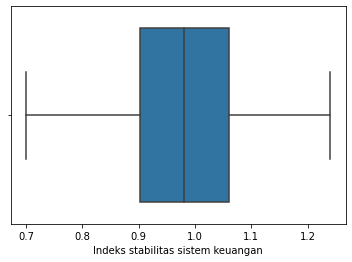

In [10]:
sns.boxplot(data["Indeks stabilitas sistem keuangan"])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IHSG'>

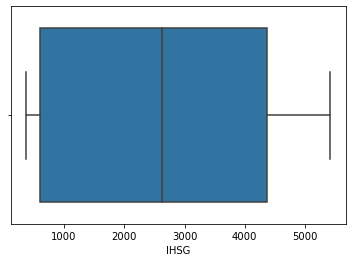

In [11]:
sns.boxplot(data["IHSG"])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IHPR'>

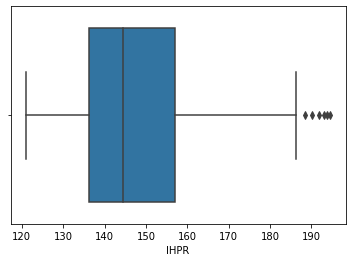

In [12]:
sns.boxplot(data["IHPR"])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Perkembangan Kredit'>

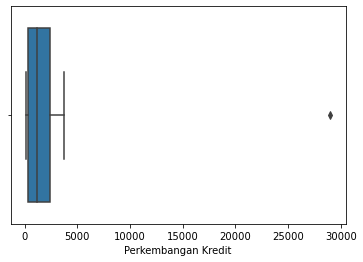

In [13]:
sns.boxplot(data["Perkembangan Kredit"])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kurs'>

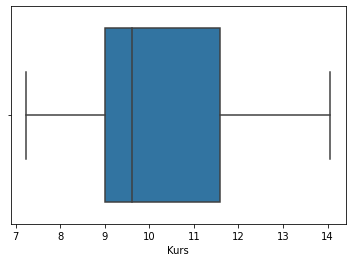

In [14]:
sns.boxplot(data["Kurs"])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Jumlah uang  beredar'>

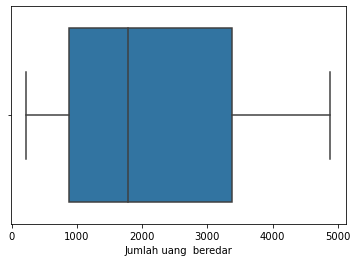

In [15]:
sns.boxplot(data["Jumlah uang  beredar"])

In [16]:
#membuat fungsi untuk mendeteksi outlier dengan lower bound dan upper bound
def outlier(sample):
    Q1=sample.quantile(0.25)
    Q3=sample.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
    print("Number of Outlier {}".format(number_outlier))
    if number_outlier>0:
        print("Outlier observation row:")
    else:
        pass
    for i in range(len(sample)):
        if sample[i]<lower_range: 
            print(i)
        elif sample[i]>upper_range:
            print(i)
        else:
            pass

In [17]:
outlier(data["IHPR"])

Number of Outlier 6
Outlier observation row:
8
9
11
27
30
42


In [18]:
data.loc[[8,9,11,27,30,42],"IHPR"]

8     191.90
9     190.02
11    193.13
27    194.54
30    188.55
42    193.83
Name: IHPR, dtype: float64

In [19]:
outlier(data["Perkembangan Kredit"])

Number of Outlier 1
Outlier observation row:
39


In [20]:
data.loc[39,"Perkembangan Kredit"]

29004.09

#### Melihat Korelasi antar variabel

<AxesSubplot:>

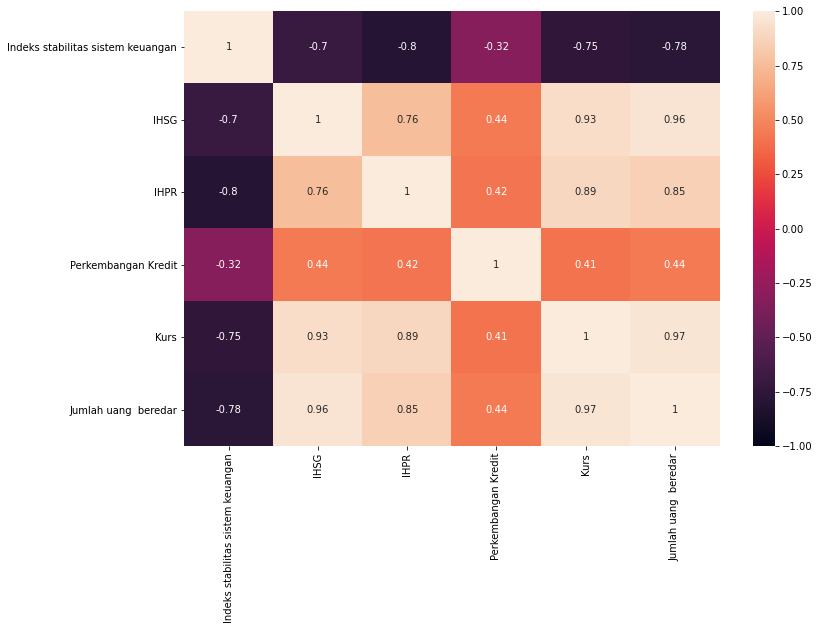

In [21]:
cor=data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,vmin=-1,vmax=1)

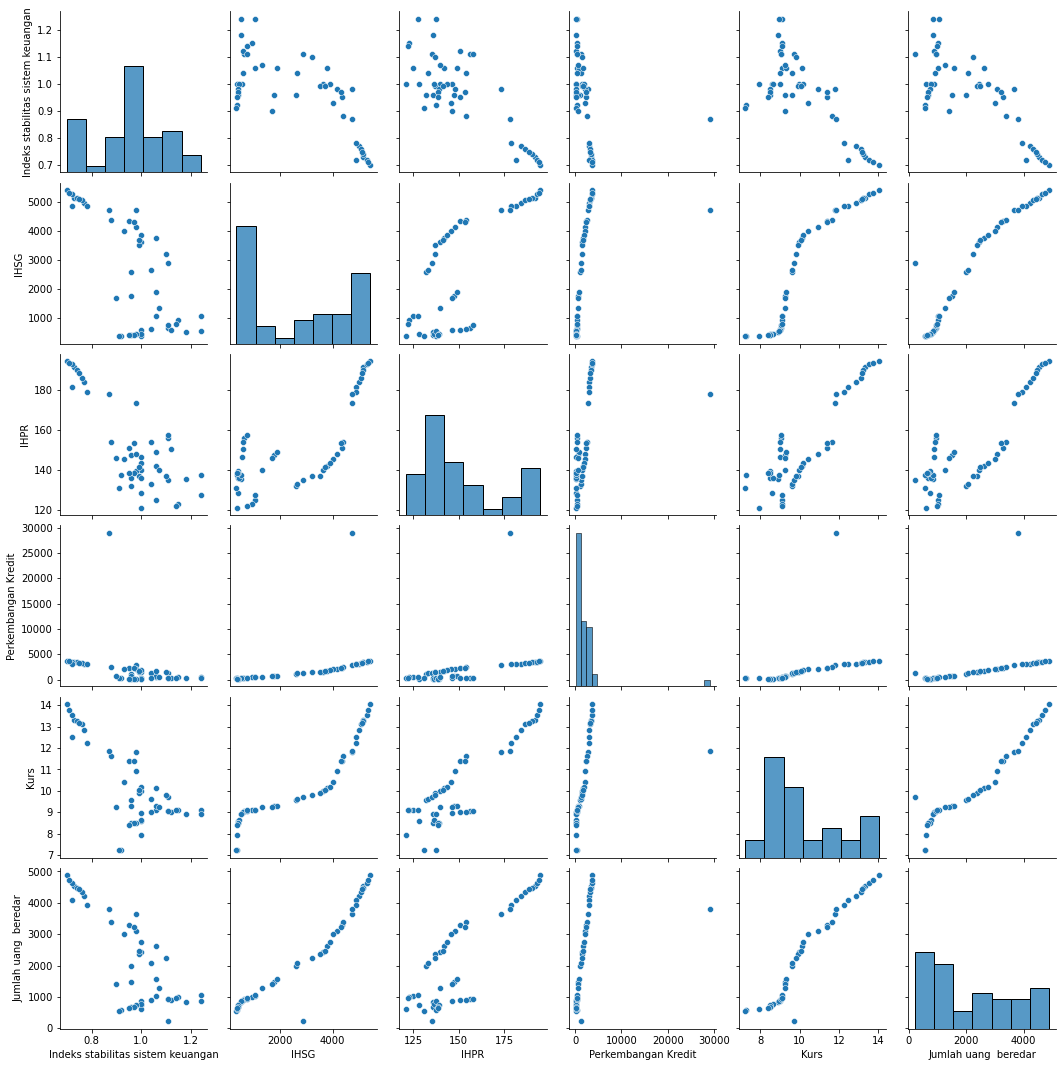

In [22]:
sns.pairplot(data=data)

#### Feature Scalling

In [23]:
from sklearn.preprocessing import StandardScaler

#Memisah variabel dependen dan independen
y=data["Indeks stabilitas sistem keuangan"]
x=data.iloc[:,1:]

#Standarisasi pada variabel independen
scale=StandardScaler()
x=scale.fit_transform(x)
x=pd.DataFrame(data=x,columns=["IHSG","IHPR","Perkembangan Kredit","Kurs","Jumlah uang  beredar"])

#### Partisi Data

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Modeling

In [25]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

#### Regresi Linear

In [26]:
X_train2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train2)
est2 = est.fit()

In [27]:
print(est2.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Indeks stabilitas sistem keuangan   R-squared:                       0.758
Model:                                           OLS   Adj. R-squared:                  0.722
Method:                                Least Squares   F-statistic:                     21.26
Date:                               Sat, 10 Apr 2021   Prob (F-statistic):           1.36e-09
Time:                                       14:26:10   Log-Likelihood:                 51.058
No. Observations:                                 40   AIC:                            -90.12
Df Residuals:                                     34   BIC:                            -79.98
Df Model:                                          5                                         
Covariance Type:                           nonrobust                                         
                           coef    std err          t      P

In [28]:
X_train2 = sm.add_constant(X_train.drop(labels=["Jumlah uang  beredar"],axis=1))
est = sm.OLS(y_train, X_train2)
est2 = est.fit()
print(est2.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Indeks stabilitas sistem keuangan   R-squared:                       0.739
Model:                                           OLS   Adj. R-squared:                  0.709
Method:                                Least Squares   F-statistic:                     24.77
Date:                               Sat, 10 Apr 2021   Prob (F-statistic):           8.65e-10
Time:                                       14:26:11   Log-Likelihood:                 49.567
No. Observations:                                 40   AIC:                            -89.13
Df Residuals:                                     35   BIC:                            -80.69
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
                          coef    std err          t      P>

In [29]:
X_train2 = sm.add_constant(X_train.drop(labels=["Jumlah uang  beredar","IHPR"],axis=1))
est = sm.OLS(y_train, X_train2)
est2 = est.fit()
print(est2.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Indeks stabilitas sistem keuangan   R-squared:                       0.714
Model:                                           OLS   Adj. R-squared:                  0.690
Method:                                Least Squares   F-statistic:                     29.92
Date:                               Sat, 10 Apr 2021   Prob (F-statistic):           6.96e-10
Time:                                       14:26:11   Log-Likelihood:                 47.723
No. Observations:                                 40   AIC:                            -87.45
Df Residuals:                                     36   BIC:                            -80.69
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                          coef    std err          t      P>

In [30]:
X_train2 = sm.add_constant(X_train.drop(labels=["Jumlah uang  beredar","IHPR","Kurs"],axis=1))
est = sm.OLS(y_train, X_train2)
est2 = est.fit()
print(est2.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Indeks stabilitas sistem keuangan   R-squared:                       0.683
Model:                                           OLS   Adj. R-squared:                  0.666
Method:                                Least Squares   F-statistic:                     39.80
Date:                               Sat, 10 Apr 2021   Prob (F-statistic):           5.99e-10
Time:                                       14:26:11   Log-Likelihood:                 45.664
No. Observations:                                 40   AIC:                            -85.33
Df Residuals:                                     37   BIC:                            -80.26
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
                          coef    std err          t      P>

In [31]:
#Cek autokorelasi
import statsmodels.api as sm
residual=est2.resid
sm.stats.diagnostic.acorr_ljungbox(residual,lags=[20],return_df=True)

,lb_stat,lb_pvalue
20,22.180794,0.330781


In [32]:
#Cek Multikolinearitas
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.drop(labels=["Jumlah uang  beredar",
                                                                    "IHPR","Kurs"],axis=1).values, i) for i in range(X_train.drop(labels=["Jumlah uang  beredar",
                                                                                                                                          "IHPR","Kurs"],axis=1).shape[1])]
vif["features"] = X_train.drop(labels=["Jumlah uang  beredar","IHPR","Kurs"],axis=1).columns
vif

,VIF Factor,features
0,4.883456,IHSG
1,4.883456,Perkembangan Kredit


In [33]:
#Cek Homoskesdastisitas
bp_test=sm.stats.diagnostic.het_breuschpagan(residual,est2.model.exog)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 7.487258634510097, 'LM-Test p-value': 0.023668048209697486, 'F-Statistic': 4.260307772308011, 'F-Test p-value': 0.021621288035320114}


#### Evaluasi Model

In [34]:
from sklearn.metrics import mean_squared_error
pred_lr=est2.predict(sm.add_constant(X_test.drop(labels=["Jumlah uang  beredar","IHPR","Kurs"],axis=1)))
mean_squared_error(y_test,pred_lr)

4.087424830993152

### Regresi Ridge

In [35]:
#Cek Multikolinearitas
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif

,VIF Factor,features
0,15.949809,IHSG
1,6.639688,IHPR
2,6.229725,Perkembangan Kredit
3,20.474934,Kurs
4,23.468013,Jumlah uang beredar


In [36]:
#Melihat Keunggulan Ridge
from sklearn.linear_model import Ridge
coef=[]
alphas = range(0,40)

for a in alphas:
  ridgereg=Ridge(alpha=a)
  ridgereg.fit(X_train,y_train)
  coef.append(ridgereg.coef_)

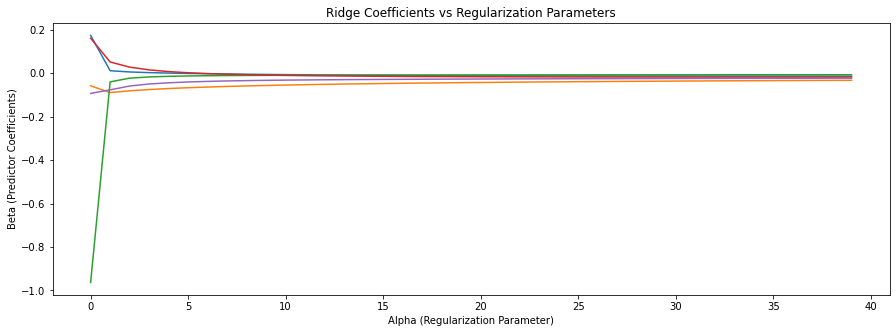

In [37]:
###Membuat plot antara alpha dan koefisien
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(alphas,coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coefficients vs Regularization Parameters')
ax.axis('tight')
###ax.legend(loc='best')
fig.savefig('coef_vs_alpha.png')

In [38]:
#Membangun model regresi ridge dengan nilai alpha terbaik
from sklearn.linear_model import RidgeCV
regr_cv=RidgeCV(alphas=range(1,40))
model_cv=regr_cv.fit(X_train,y_train)

#alpha terbaik
print(model_cv.alpha_)

#Parameter regresi ridge
print(model_cv.intercept_)
print(model_cv.coef_)

1
0.9507083375490761
[ 0.01169928 -0.08888263 -0.0396696   0.05181744 -0.07637162]


In [39]:
#Cek autokorelasi
import statsmodels.api as sm
residual1=y_train-(model_cv.predict(X_train))
sm.stats.diagnostic.acorr_ljungbox(residual1,lags=[20],return_df=True)

,lb_stat,lb_pvalue
20,35.373701,0.018202


In [40]:
#Cek Homoskesdastisitas
bp_test=sm.stats.diagnostic.het_breuschpagan(residual1,X_train)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 19.528144680031573, 'LM-Test p-value': 0.0006187195937999505, 'F-Statistic': 6.677314323674685, 'F-Test p-value': 0.00018373553989099408}


In [41]:
#Cek Normalitas
import scipy
scipy.stats.jarque_bera(residual1)

Jarque_beraResult(statistic=5.06422850737395, pvalue=0.0794907788237944)

#### Evaluasi Model

In [42]:
#MSE
pred_lridge=model_cv.predict(X_test)
mean_squared_error(y_test,pred_lridge)

0.017080924531470858

### Regresi Lasso

In [43]:
#Melihat Keunggulan Lasso
from sklearn.linear_model import Lasso
coef=[]
alphas = range(0,40)

for a in alphas:
  lassoreg=Lasso(alpha=a)
  lassoreg.fit(X_train,y_train)
  coef.append(lassoreg.coef_)

<ipython-input-43-a77f8602b0fa>:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lassoreg.fit(X_train,y_train)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0911707895171519, tolerance: 7.5251e-05
  model = cd_fast.enet_coordinate_descent(


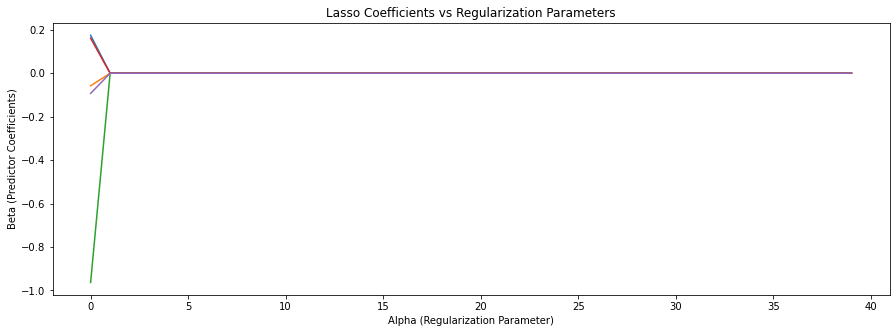

In [44]:
###Membuat plot antara alpha dan koefisien
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(alphas,coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Lasso Coefficients vs Regularization Parameters')
ax.axis('tight')
###ax.legend(loc='best')
fig.savefig('coef_vs_alpha.png')

In [45]:
#Membangun model regresi Lasso dengan nilai alpha terbaik
from sklearn.linear_model import LassoCV
regl_cv=LassoCV(alphas=range(1))
model_cv=regl_cv.fit(X_train,y_train)

#alpha terbaik
print(model_cv.alpha_)

#Parameter regresi Lasso
print(model_cv.intercept_)
print(model_cv.coef_)

0
0.8320810000739854
[ 0.17445186 -0.05775816 -0.96300566  0.16120892 -0.09288694]


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0789882637366574, tolerance: 6.090718750000002e-05
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.077636003

In [46]:
#Cek autokorelasi
import statsmodels.api as sm
residual1=y_train-(model_cv.predict(X_train))
sm.stats.diagnostic.acorr_ljungbox(residual1,lags=[20],return_df=True)

,lb_stat,lb_pvalue
20,27.393227,0.124559


In [47]:
#Cek Homoskesdastisitas
bp_test=sm.stats.diagnostic.het_breuschpagan(residual1,X_train)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 17.734611868654827, 'LM-Test p-value': 0.0013905178140421212, 'F-Statistic': 5.57557237934768, 'F-Test p-value': 0.0007026611619787649}


In [48]:
#Cek Normalitas
import scipy
scipy.stats.jarque_bera(residual1)

Jarque_beraResult(statistic=4.004709277707931, pvalue=0.1350169923974387)

#### Evaluasi Model

In [49]:
#MSE
pred_llasso=model_cv.predict(X_test)
mean_squared_error(y_test,pred_llasso)

3.980174651808035

### Regresi Elastic Net

In [50]:
#Melihat Keunggulan Ridge
from sklearn.linear_model import ElasticNet
coef=[]
alphas = range(0,40)

for a in alphas:
        Enetreg=ElasticNet(alpha=a)
        Enetreg.fit(X_train,y_train)
        coef.append(Enetreg.coef_)

<ipython-input-50-80d9f8bff99d>:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  Enetreg.fit(X_train,y_train)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0911707895171519, tolerance: 7.5251e-05
  model = cd_fast.enet_coordinate_descent(


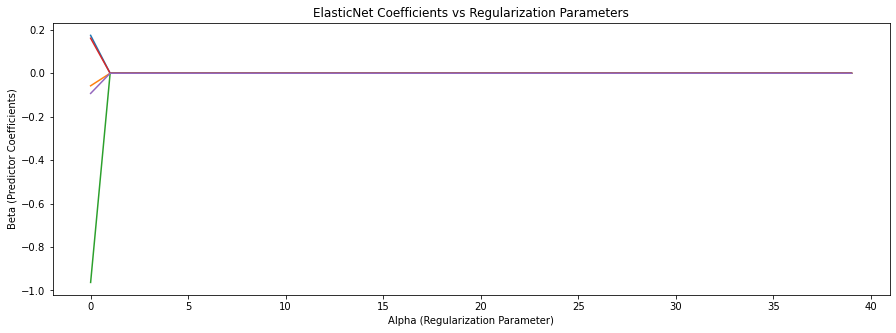

In [51]:
###Membuat plot antara alpha dan koefisien
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(alphas,coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('ElasticNet Coefficients vs Regularization Parameters')
ax.axis('tight')
###ax.legend(loc='best')
fig.savefig('coef_vs_alpha.png')

In [52]:
#Membangun model regresi ElasticNetCV dengan nilai alpha terbaik
from sklearn.linear_model import ElasticNetCV
Enet_cv=ElasticNetCV(alphas=range(1),l1_ratio=0.5)
model_cv=Enet_cv.fit(X_train,y_train)

#alpha terbaik
print(model_cv.alpha_)

#Parameter regresi ElasticNetCV
print(model_cv.intercept_)
print(model_cv.coef_)

0
0.8320810000739854
[ 0.17445186 -0.05775816 -0.96300566  0.16120892 -0.09288694]


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0789882637366574, tolerance: 6.090718750000002e-05
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.077636003

In [53]:
#Cek autokorelasi
import statsmodels.api as sm
residual1=y_train-(model_cv.predict(X_train))
sm.stats.diagnostic.acorr_ljungbox(residual1,lags=[20],return_df=True)

,lb_stat,lb_pvalue
20,27.393227,0.124559


In [54]:
#Cek Homoskesdastisitas
bp_test=sm.stats.diagnostic.het_breuschpagan(residual1,X_train)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 17.734611868654827, 'LM-Test p-value': 0.0013905178140421212, 'F-Statistic': 5.57557237934768, 'F-Test p-value': 0.0007026611619787649}


In [55]:
#Cek Normalitas
import scipy
scipy.stats.jarque_bera(residual1)

Jarque_beraResult(statistic=4.004709277707931, pvalue=0.1350169923974387)

#### Evaluasi Model

In [56]:
#MSE
pred_Enet=model_cv.predict(X_test)
mean_squared_error(y_test,pred_Enet)

3.980174651808035